### **Necessary Imports**

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
import plotly
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

### **Gathering Dataset**

Loading the Data

In [11]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)

shape of x_train:  (60000, 28, 28)
shape of x_test:  (10000, 28, 28)


### **Instantiate or Build the Model**

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

### **Compile & Train the model**

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2947 - accuracy: 0.9154 - val_loss: 0.1517 - val_accuracy: 0.9561
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1417 - accuracy: 0.9575 - val_loss: 0.1023 - val_accuracy: 0.9695
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1063 - accuracy: 0.9681 - val_loss: 0.0851 - val_accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0867 - accuracy: 0.9733 - val_loss: 0.0746 - val_accuracy: 0.9759
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0746 - accuracy: 0.9766 - val_loss: 0.0739 - val_accuracy: 0.9773
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0636 - accuracy: 0.9804 - val_loss: 0.0714 - val_accuracy: 0.9780
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0573 - accuracy: 0.9814 - val_loss: 0.0693 - val_accuracy:

##### **Plotting Loss per Iteration**


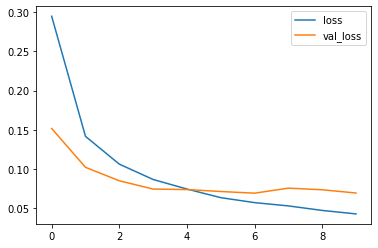

In [15]:
plt.plot(r.history['loss'], label= 'loss')
plt.plot(r.history['val_loss'], label= 'val_loss')
plt.legend()

##### **Plotting Accuracy per Iteration**


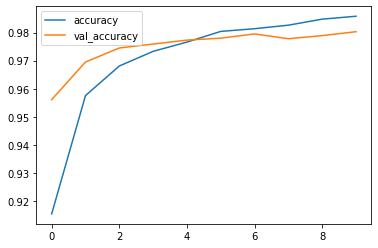

In [16]:
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label= 'val_accuracy')
plt.legend()

#### **Model Evaluation**

In [17]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0695 - accuracy: 0.9803
[0.06951521337032318, 0.9803000092506409]


#### **Confusion Matrix**

Confusion matrix without normalization
[[ 971    0    1    0    1    2    2    2    1    0]
 [   0 1124    3    1    0    1    2    1    3    0]
 [   7    2  999    2    4    0    3    6    9    0]
 [   0    0    2  989    0    3    0    4    7    5]
 [   1    0    0    0  966    0    5    4    2    4]
 [   2    0    0    6    2  875    3    2    1    1]
 [   4    1    0    1    5    4  941    0    2    0]
 [   1    4    8    2    0    0    0 1008    2    3]
 [   3    1    3    4    4    2    1    3  949    4]
 [   3    5    0    1    9    1    0    8    1  981]]


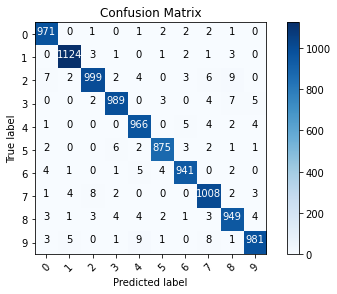

In [18]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title="Confusion Matrix",
                          cmap = plt.cm.Blues):
  
  """
  This function prints and plots the confusion matrix.
  Normalize can be applied by setting 'normalize = True'
  """
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  
  else:
    print("Confusion matrix without normalization")
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = "white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))           

##### **Do these results make sense?**
- It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.

### **Plotting few Places where the Model went wrong**

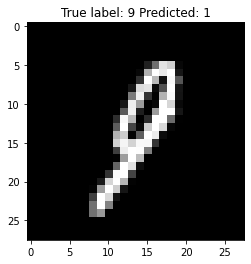

In [19]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap= 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));